# PyCaret 2 Classification Example
This notebook is created using PyCaret 2.0. Last updated : 21-08-2020

In [1]:
# check version
from pycaret.utils import version
version()

'2.1.2'

# 1. Importar datos

In [2]:
import pandas as pd
df = pd.read_csv('datos_finales.csv')
df

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,target
0,4088,3313,4690,4095,4443,5200,4397,4837,3892,3896,...,4934,4680,4779,4658,4961,4717,4704,4938,4475,1
1,2729,2524,3201,3088,3184,3631,3257,3326,2879,2850,...,3428,3350,3367,3384,3430,3320,3306,3411,3206,1
2,3560,3012,4051,3736,3961,4613,4022,4227,3490,3496,...,4367,4195,4243,4187,4349,4172,4162,4329,3982,1
3,2044,1715,2241,2209,2269,2641,2320,2365,2019,1985,...,2509,2405,2449,2433,2425,2367,2376,2468,2295,1
4,2905,2583,3374,3117,3291,3792,3353,3484,2956,2933,...,3590,3482,3506,3473,3593,3455,3448,3585,3318,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,364,283,208,57,317,108,447,-34,132,239,...,295,162,202,405,155,427,292,82,240,0
107,252,98,333,76,19,109,242,-34,-90,-25,...,279,57,-57,409,-53,11,-10,115,13,0
108,205,183,329,248,-132,102,81,392,226,-87,...,226,301,59,190,117,301,261,4,94,0
109,-15,194,24,241,200,199,245,-185,43,202,...,167,511,117,287,-1,245,256,238,469,0


# 2. Initialize Setup

In [3]:
from pycaret.classification import *
clf1 = setup(df, target = 'target', session_id=123, log_experiment=True, experiment_name='descubrimiento_14')

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(111, 51)"
4,Missing Values,False
5,Numeric Features,50
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# 3. Compare Baseline

In [4]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0024
1,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0027
2,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0028
3,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0251
4,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0040
5,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0891
6,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1116
7,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0172
8,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0130
9,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.8406


# 4. Create Model

In [5]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8750,1.0000,1.0000,0.8571,0.9231,0.6000,0.6547
1,0.6250,0.8000,0.8000,0.6667,0.7273,0.1429,0.1491
2,0.8750,0.9333,1.0000,0.8333,0.9091,0.7143,0.7454
3,0.8750,1.0000,1.0000,0.8333,0.9091,0.7143,0.7454
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.7500,1.0000,1.0000,0.7143,0.8333,0.3846,0.4880
6,0.7500,1.0000,1.0000,0.7143,0.8333,0.3846,0.4880
7,0.7143,0.8000,0.8000,0.8000,0.8000,0.3000,0.3000
8,0.7143,0.8000,0.8000,0.8000,0.8000,0.3000,0.3000
9,0.8571,0.9000,1.0000,0.8333,0.9091,0.5882,0.6455


In [6]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [7]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
SD,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [9]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']

In [11]:
ensembled_models = compare_models(include = models(type='ensemble').index.tolist(), fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0228
1,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0042
2,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0560
3,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1025
4,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0132
5,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0097
6,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.4764


# 5. Tune Hyperparameters

In [12]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8750,1.0000,1.0000,0.8571,0.9231,0.6000,0.6547
1,0.6250,0.8000,0.8000,0.6667,0.7273,0.1429,0.1491
2,0.8750,0.9333,1.0000,0.8333,0.9091,0.7143,0.7454
3,0.8750,1.0000,1.0000,0.8333,0.9091,0.7143,0.7454
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.7500,1.0000,1.0000,0.7143,0.8333,0.3846,0.4880
6,0.7500,1.0000,1.0000,0.7143,0.8333,0.3846,0.4880
7,0.7143,0.8000,0.8000,0.8000,0.8000,0.3000,0.3000
8,0.7143,0.8000,0.8000,0.8000,0.8000,0.3000,0.3000
9,0.8571,0.9000,1.0000,0.8333,0.9091,0.5882,0.6455


In [13]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# 6. Ensemble Model

In [14]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [15]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# 7. Blend Models

In [16]:
blender = blend_models(estimator_list = [boosted_dt, bagged_dt], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# 8. Stack Models

In [17]:
stacker = stack_models(estimator_list = [boosted_dt,bagged_dt,tuned_rf], meta_model=rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# 9. Analyze Model

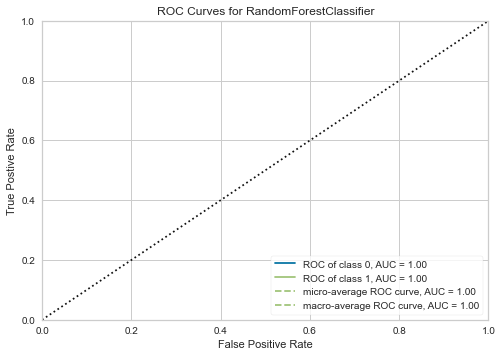

In [18]:
plot_model(rf)

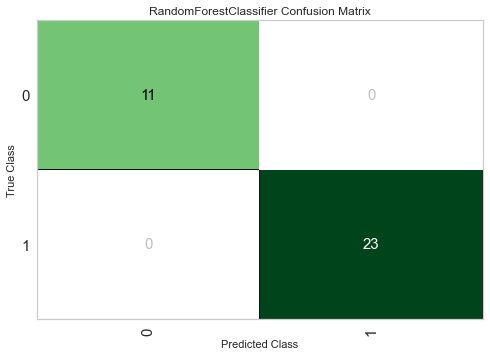

In [19]:
plot_model(rf, plot = 'confusion_matrix')

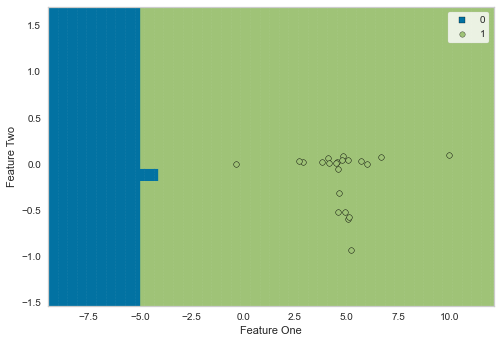

In [20]:
plot_model(rf, plot = 'boundary')

In [21]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 10. Interpret Model

In [22]:
catboost = create_model('catboost', cross_validation=False)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostClassifier object at 0x14c0ead90>, plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:model type detected: type 2
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


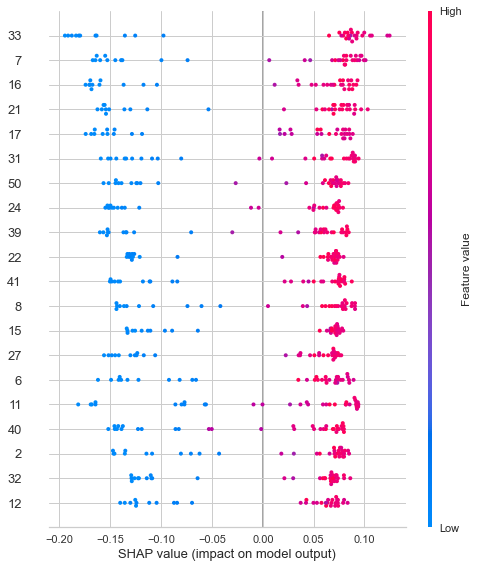

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [24]:
interpret_model(catboost)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostClassifier object at 0x14c0ead90>, plot=correlation, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: correlation
INFO:logs:model type detected: type 2
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


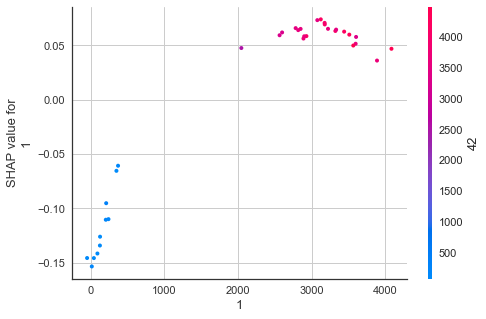

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [25]:
interpret_model(catboost, plot = 'correlation')

In [26]:
interpret_model(catboost, plot = 'reason', observation = 12)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostClassifier object at 0x14c0ead90>, plot=reason, feature=None, observation=12)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: reason
INFO:logs:model type detected: type 2
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


# 11. AutoML()

In [27]:
best = automl(optimize = 'Recall')
best

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=False, system=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Copying training dataset
INFO:logs:Importing libraries
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:K Neighbors Classifier Imported succesfully
INFO:logs:Checking ensemble method
INFO:logs:Initializing Fold 1
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 2
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 3
INFO:logs:

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

# 12. Predict Model

In [28]:
pred_holdouts = predict_model(lr)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7059,0.7866,0.7826,0.7826,0.7826,0.3281,0.3281


,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,target,Label,Score
0,91.0,167.0,209.0,119.0,191.0,297.0,227.0,306.0,212.0,241.0,...,81.0,620.0,158.0,220.0,97.0,5.0,268.0,0,0,0.0000
1,3176.0,2946.0,3665.0,3595.0,3677.0,4262.0,3829.0,3848.0,3302.0,3337.0,...,3892.0,3902.0,3982.0,3842.0,3824.0,3952.0,3698.0,1,1,1.0000
2,241.0,284.0,92.0,158.0,255.0,337.0,478.0,7.0,-141.0,278.0,...,304.0,58.0,-34.0,36.0,202.0,281.0,293.0,0,1,1.0000
3,3220.0,3222.0,3383.0,2616.0,3809.0,3770.0,4213.0,3125.0,3455.0,3032.0,...,3922.0,2338.0,2620.0,3090.0,3749.0,3280.0,3179.0,1,1,0.9999
4,371.0,412.0,331.0,183.0,138.0,268.0,101.0,-75.0,70.0,284.0,...,314.0,294.0,56.0,119.0,272.0,-52.0,96.0,0,1,0.9892


In [30]:
new_data = df.copy()
new_data.drop(['target'], axis=1, inplace=True)
predict_new = predict_model(lr, data=new_data)
predict_new.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,Label,Score
0,4088,3313,4690,4095,4443,5200,4397,4837,3892,3896,...,4680,4779,4658,4961,4717,4704,4938,4475,1,1.0
1,2729,2524,3201,3088,3184,3631,3257,3326,2879,2850,...,3350,3367,3384,3430,3320,3306,3411,3206,1,1.0
2,3560,3012,4051,3736,3961,4613,4022,4227,3490,3496,...,4195,4243,4187,4349,4172,4162,4329,3982,1,1.0
3,2044,1715,2241,2209,2269,2641,2320,2365,2019,1985,...,2405,2449,2433,2425,2367,2376,2468,2295,1,1.0
4,2905,2583,3374,3117,3291,3792,3353,3484,2956,2933,...,3482,3506,3473,3593,3455,3448,3585,3318,1,1.0


# 13. Save / Load Model

In [31]:
save_model(lr, model_name='best-model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=best-model, model_only=False, verbose=True)
INFO:logs:Adding model into prep_pipe
INFO:logs:best-model.pkl saved in current working directory
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imp

Transformation Pipeline and Model Succesfully Saved


In [32]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Lev...
                ('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),
                ('feature_select', Empty()), ('fix_multi', Empty()),
                ('dfs', Empty()), ('pca', Empty()),
                ['trained model',
                 LogisticRegression

In [33]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

DataTypes_Auto_infer(categorical_features=[], display_types=True,
                     features_todrop=[], ml_usecase='classification',
                     numerical_features=[], target='target', time_features=[])

In [34]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [36]:
#deploy_model(lr, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})

# 15. Get Config / Set Config

In [37]:
X_train = get_config('X_train')
X_train.head()

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=X_train)
INFO:logs:Global variable: X_train returned
INFO:logs:get_config() succesfully completed......................................


,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,4088.0,3313.0,4690.0,4095.0,4443.0,5200.0,4397.0,4837.0,3892.0,3896.0,...,4936.0,4934.0,4680.0,4779.0,4658.0,4961.0,4717.0,4704.0,4938.0,4475.0
79,105.0,217.0,-49.0,160.0,20.0,288.0,165.0,248.0,141.0,55.0,...,601.0,215.0,498.0,5.0,226.0,83.0,56.0,149.0,223.0,35.0
1,2729.0,2524.0,3201.0,3088.0,3184.0,3631.0,3257.0,3326.0,2879.0,2850.0,...,3426.0,3428.0,3350.0,3367.0,3384.0,3430.0,3320.0,3306.0,3411.0,3206.0
65,2969.0,3089.0,2349.0,2469.0,3351.0,4152.0,3331.0,2598.0,2964.0,2099.0,...,4675.0,3585.0,4111.0,3134.0,3700.0,3995.0,3627.0,2785.0,2750.0,4156.0
88,190.0,260.0,122.0,-87.0,372.0,20.0,150.0,-41.0,379.0,178.0,...,-67.0,136.0,368.0,130.0,305.0,-135.0,112.0,-24.0,195.0,153.0


In [38]:
get_config('seed')

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=seed)
INFO:logs:Global variable: seed returned
INFO:logs:get_config() succesfully completed......................................


123

In [39]:
from pycaret.classification import set_config
set_config('seed', 999)

INFO:logs:Initializing set_config()
INFO:logs:set_config(variable=seed, value=999)
INFO:logs:Global variable:  seed updated
INFO:logs:set_config() succesfully completed......................................


In [40]:
get_config('seed')

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=seed)
INFO:logs:Global variable: seed returned
INFO:logs:get_config() succesfully completed......................................


999

# 16. Get System Logs

In [41]:
get_system_logs()

['2020-09-27 21', '00', '50,420', 'INFO', 'PyCaret Clustering Module']
['2020-09-27 21', '00', '50,420', 'INFO', 'version 2.1.2']
['2020-09-27 21', '00', '50,420', 'INFO', 'Initializing setup()']
['2020-09-27 21', '00', '50,421', 'INFO', 'USI', '8942']
['2020-09-27 21', '00', '50,421', 'INFO', 'setup(data=(111, 51), categorical_features=None, categorical_imputation=constant, ordinal_features=None, high_cardinality_features=None,']
['numeric_features=None, numeric_imputation=mean, date_features=None, ignore_features=None, normalize=False,']
['normalize_method=zscore, transformation=False, transformation_method=yeo-johnson, handle_unknown_categorical=True, unknown_categorical_method=least_frequent, pca=False, pca_method=linear,']
['pca_components=None, ignore_low_variance=False, combine_rare_levels=False, rare_level_threshold=0.1, bin_numeric_features=None,']
['remove_multicollinearity=False, multicollinearity_threshold=0.9, group_features=None,']
['group_names=None, supervised=False, su

['2020-09-27 21', '07', '49,070', 'INFO', 'Fitting Model']
['2020-09-27 21', '07', '50,442', 'INFO', 'Evaluating Metrics']
['2020-09-27 21', '07', '51,770', 'INFO', 'Compiling Metrics']
['2020-09-27 21', '07', '51,788', 'INFO', 'Initializing Fold 2']
['2020-09-27 21', '07', '51,793', 'INFO', 'Fitting Model']
['2020-09-27 21', '07', '53,614', 'INFO', 'Evaluating Metrics']
['2020-09-27 21', '07', '54,124', 'INFO', 'Compiling Metrics']
['2020-09-27 21', '07', '54,140', 'INFO', 'Initializing Fold 3']
['2020-09-27 21', '07', '54,144', 'INFO', 'Fitting Model']
['2020-09-27 21', '07', '55,829', 'INFO', 'Evaluating Metrics']
['2020-09-27 21', '07', '56,944', 'INFO', 'Compiling Metrics']
['2020-09-27 21', '07', '56,959', 'INFO', 'Initializing Fold 4']
['2020-09-27 21', '07', '56,963', 'INFO', 'Fitting Model']
['2020-09-27 21', '07', '58,149', 'INFO', 'Evaluating Metrics']
['2020-09-27 21', '07', '58,969', 'INFO', 'Compiling Metrics']
['2020-09-27 21', '07', '58,982', 'INFO', 'Initializing Fold 

# 17. MLFlow UI

In [ ]:
!mlflow ui

In [ ]:
# to generate csv file with experiment logs
get_logs()

# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org